[Colab Kaggle Setup Reference](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463)

Datasets:


*   [GDELT 2.0 World Events Database](https://console.cloud.google.com/bigquery?p=gdelt-bq&d=gdeltv2&page=dataset) (World Events (Country-Level).csv)
*   [World Happiness Report](https://www.kaggle.com/mathurinache/world-happiness-report) (Kaggle import)
*   [Federal Reserve Foreign Exchange Rates](https://www.kaggle.com/brunotly/foreign-exchange-rates-per-dollar-20002019) (Kaggle import)
*   [UN Development Program Suicide Rates](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) (Kaggle import)
*   [Country Codes Mapping](https://www.iban.com/country-codes) (country_code_mapping.csv)


# START HERE

In [ ]:
# Install kaggle package, load libs & set up API token + PATH; download data

import json
import pandas as pd
import os, glob

!pip install kaggle
!rm -r sample_data/
!mkdir .kaggle
!rm /content/*

token = {"username":"danieltheron","key":"74494e53f46123380196ad8baeeafe47"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

# Download and unzip Kaggle data

!kaggle datasets download -d mathurinache/world-happiness-report -p /content/
!kaggle datasets download -d brunotly/foreign-exchange-rates-per-dollar-20002019 -p /content/
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016 -p /content/

!unzip \*.zip
!rm /content/*.zip
!rm /content/*.xlsx

rm: cannot remove 'sample_data/': No such file or directory
mkdir: cannot create directory ‘.kaggle’: File exists
rm: cannot remove '/content/*': No such file or directory
- path is now set to: {/content}
  0% 0.00/53.9k [00:00<?, ?B/s]
100% 53.9k/53.9k [00:00<00:00, 21.0MB/s]
  0% 0.00/1.21M [00:00<?, ?B/s]
100% 1.21M/1.21M [00:00<00:00, 40.7MB/s]
  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 26.4MB/s]
Archive:  foreign-exchange-rates-per-dollar-20002019.zip
  inflating: Foreign_Exchange_Rates.csv  
  inflating: Foreign_Exchange_Rates.xlsx  

Archive:  suicide-rates-overview-1985-to-2016.zip
  inflating: master.csv              

Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                

3 archives were successfully processed.


## Load Happiness Data (df_happiness)

In [ ]:
df_hap_2015 = pd.read_csv('2015.csv', sep = ',')
df_hap_2016 = pd.read_csv('2016.csv', sep = ',')
df_hap_2017 = pd.read_csv('2017.csv', sep = ',')
df_hap_2018 = pd.read_csv('2018.csv', sep = ',')
df_hap_2019 = pd.read_csv('2019.csv', sep = ',')
df_hap_2020 = pd.read_csv('2020.csv', sep = ',')

In [ ]:
df_hap_2015['Year'] = 2015
df_hap_2016['Year'] = 2016

df_hap_2017['Year'] = 2017
df_hap_2017.rename(columns = {'Happiness.Score': 'Happiness Score', 
                              'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.':'Health (Life Expectancy)', 
                              'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual', 'Happiness.Rank': 'Happiness Rank'},
                   inplace = True)

df_hap_2018['Year'] = 2018
df_hap_2018.rename(columns = {'Country or region': 'Country', 
                              'GDP per capita': 'Economy (GDP per Capita)',
                              'Score': 'Happiness Score', 'Healthy life expectancy':'Health (Life Expectancy)', 
                              'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)', 'Overall rank': 'Happiness Rank'},
                   inplace = True)

df_hap_2019['Year'] = 2019
df_hap_2019.rename(columns = {'Country or region': 'Country', 
                              'GDP per capita': 'Economy (GDP per Capita)',
                              'Score': 'Happiness Score', 'Overall rank': 'Happiness Rank', 'Healthy life expectancy': 'Health (Life Expectancy)', 
                              'Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)'},
                   inplace = True)

df_hap_2020['Year'] = 2020
df_hap_2020.rename(columns = {'Country name': 'Country',
                              'Ladder score': 'Happiness Score', 'Explained by: Healthy life expectancy':'Health (Life Expectancy)', 
                              'Explained by: Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)', 'Explained by: Log GDP per capita':'Economy (GDP per Capita)',
                              'Explained by: Perceptions of corruption':'Trust (Government Corruption)', 'Regional indicator' : 'Region'},
                   inplace = True)

df_happiness = pd.concat([df_hap_2015, df_hap_2016, df_hap_2017, df_hap_2018, df_hap_2019]) 


## Load Suicide, Forex & Country Code Data (df_suicide, df_forex, df_codes)

In [ ]:
df_suicide = pd.read_csv('master.csv', sep = ',')
df_forex = pd.read_csv('Foreign_Exchange_Rates.csv', sep = ',')
df_codes = pd.read_csv('country_code_mapping.csv', sep = ',')

## Load Events Data (df_events)

In [ ]:
import pandas as pd

df_events = pd.read_csv('World Events (Country-Level).csv', sep = ',')
df_events['prevailing_tone'] = (df_events['avg_AvgTone'] * df_events['avg_GoldsteinScale'] * df_events['sum_NumArticles']) / 1000000
df_events['num_items'] = len(df_events)

# Analyses

## Exploratory Plots for Proposal

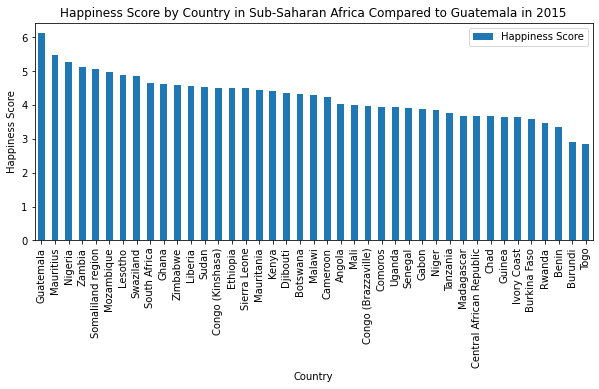

In [ ]:
import matplotlib.pyplot as plt

selected_region = 'Sub-Saharan Africa'
selected_comparison_country = 'Guatemala'
selected_year = 2015

fig_0 = df_happiness[(df_happiness['Year'] == selected_year) & 
                     ((df_happiness['Region'] == selected_region) | (df_happiness['Country'] == selected_comparison_country))].plot(
                         x='Country', 
                         y='Happiness Score', 
                         kind='bar', 
                         figsize=(10,4), 
                         title=f'Happiness Score by Country in {selected_region} Compared to {selected_comparison_country} in {selected_year}')
fig_0.set_ylabel("Happiness Score")
plt.show()

In [ ]:
df_events['ActionGeo_CountryCode']

,Year,avg_GoldsteinScale,sum_NumArticles,avg_AvgTone,min_AvgTone,max_AvgTone,prevailing_tone,num_items
count,1565.000000,1565.000000,1.565000e+03,1565.000000,1565.000000,1565.000000,1565.000000,1565.0
mean,2017.497764,0.963988,1.940973e+06,-1.471372,-21.856491,16.570319,-1.543801,1565.0
std,1.707371,0.811432,7.068382e+06,1.090246,8.439344,6.599428,7.790569,0.0
min,2015.000000,-4.620000,4.000000e+00,-5.496454,-77.898551,-5.496454,-117.151002,1565.0
25%,2016.000000,0.643884,5.658700e+04,-2.063753,-26.666667,13.164557,-1.370616,1565.0
50%,2017.000000,1.042834,3.519500e+05,-1.452165,-22.321429,17.094017,-0.283967,1565.0
75%,2019.000000,1.367493,1.395961e+06,-0.811180,-16.867470,20.338983,-0.010463,1565.0
max,2020.000000,7.400000,1.251169e+08,3.309846,3.309846,43.103448,56.890136,1565.0


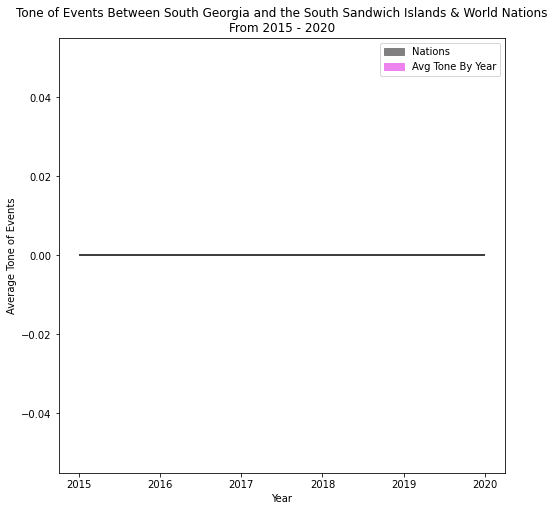

In [ ]:
# Plots a random nation each time the cell is run. If it throws an exception
# it's likely because the random nation is not in df_events. Just run the cell
# again until it finds one.
# To plot a specific nation, comment out line 8 and un-comment line 9.
# Note: The fact that the trendlines over years for all nations I've plotted so
#       far are almost all flat around x=0 is suspicious. I wonder if this is an
#       artifact of the model used to generate the AvgTone feature... Or maybe
#       I'm doing something wrong. Consider switching to bubble plot where dot
#       size represents avg_GoldsteinScale or sum_NumArticles?

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

actor1_country_code = df_codes[df_codes.index == random.randint(0, 248)].values[0][2]
#actor1_country_code = 'USA'
actor1_country = df_codes[df_codes['alpha-3'] == actor1_country_code].country

fig_1 = df_events[(df_events['ActionGeo_CountryCode'] == actor1_country_code)].plot(
    x='Year', 
    y='avg_AvgTone', 
    kind='scatter', 
    figsize=(8,8), 
    c='grey', 
    title=f'Tone of Events Between {actor1_country.values[0]} & World Nations\nFrom 2015 - 2020')
plt.hlines(0, 2015, 2020)
fig_1.set_ylabel("Average Tone of Events")

y = pd.DataFrame(df_events[(df_events['ActionGeo_CountryCode'] == actor1_country_code)].groupby('Year').sum())
#trendline = [float((y[y.index == z].avg_AvgTone / y[y.index == z].num_items)) for z in range(2015, 2021)]

p_a = mpatches.Patch(color='violet', label='Avg Tone By Year')
p_b = mpatches.Patch(color='grey', label='Nations')
plt.legend(handles=[p_b, p_a])

#plt.plot(range(2015, 2021), trendline, c='violet')
plt.show()

# Hypothesis Evaluations

## Hypothesis 1
There is a positive relationship between national productivity (measured using GDP per capita), foreign exchange rates, and national happiness.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sn

# !! For a better understanding of averages, need to think of a way to aggreagate
# and compare on a global scale GDP to hap. May need to look at Logs here to 
# standardize and compare
# Overview / Sudo code
# remove logged GDP for 2020
economic_df = df_happiness
# 1 country line of GDP, points of GNH (Gross national happiness)

def gdp_hap(country):
  gdp = economic_df[(economic_df['Country'] == country)].groupby('Year')['Economy (GDP per Capita)'].sum()
  # plt.plot(swiss_gdp)
  hap = economic_df[(economic_df['Country'] == country)].groupby('Year')['Happiness Score'].sum()
  # swiss_hap.plot(style='.')

  fig, ax1 = plt.subplots()
  ax1.set_title(country)
  color = 'tab:red'
  ax1.set_xlabel('Year')
  ax1.set_ylabel('GDP', color=color)
  ax1.plot(gdp, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('Happiness Score', color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.plot(hap)
# print('Countries react very differently to recession')
# gdp_hap('Norway')
# gdp_hap('Latvia')
# gdp_hap('Greece')
# # print('Belgium got very sad, experienced a recession, and subsequently got happier!')
# gdp_hap('Belgium')
# # gdp_hap('South Africa')
gdp_hap('South Korea')
# gdp_hap('Brazil')
# gdp_hap('China')
# gdp_hap('Chile')
# gdp_hap('Spain')

# fig, axs = plt.subplots(ncols=2, figsize=(15,10))
# sn.regplot(df_hap_2015['Happiness Score'], df_hap_2015['Economy (GDP per Capita)'])
sn.scatterplot(economic_df['Happiness Score'], economic_df['Economy (GDP per Capita)'], hue = economic_df['Region'], ax = axs[0], legend = 'full')
# sn.regplot(economic_df['Happiness Score'], economic_df['Economy (GDP per Capita)'], ax = axs[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

## Hypothesis 2
There is a positive relationship between average national family size and life expectancy and happiness.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


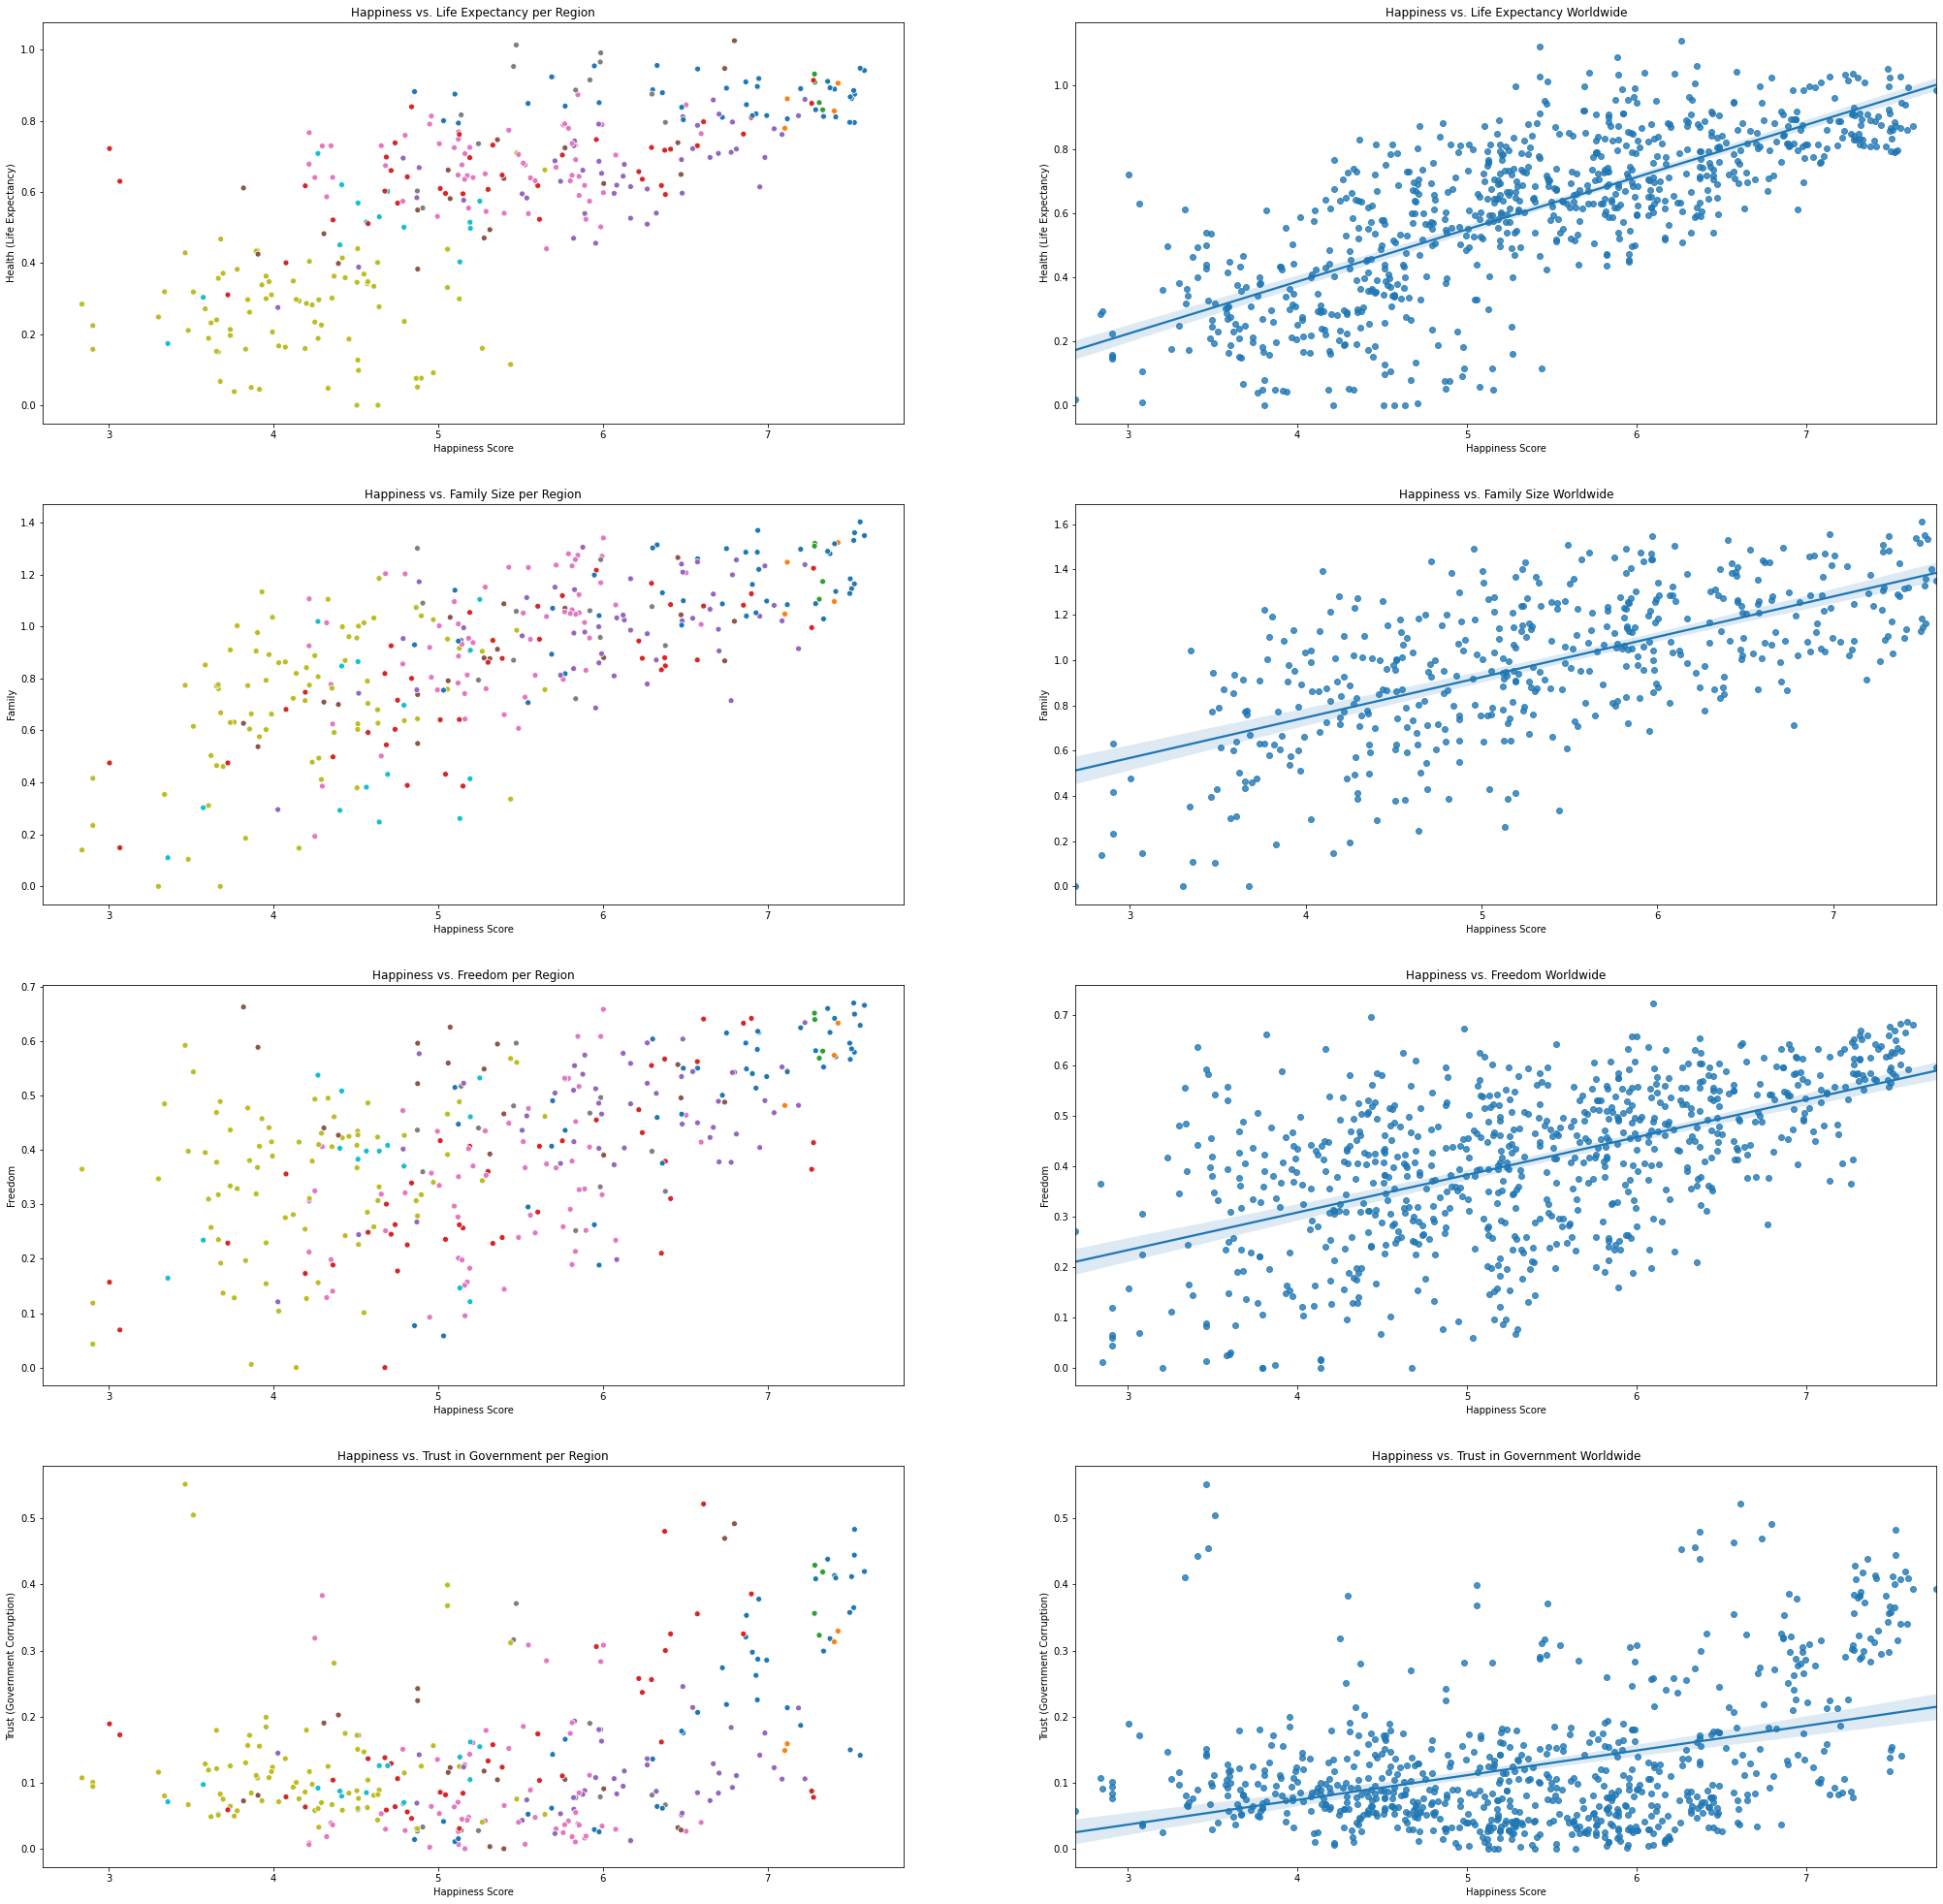

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats

#Scatter Plots
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(35,35))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

#Happiness & Life Expectancy 
sn.scatterplot(df_happiness['Happiness Score'], df_happiness['Health (Life Expectancy)'], hue = df_happiness['Region'], ax = axs[0,0], legend = False)
sn.regplot(df_happiness['Happiness Score'], df_happiness['Health (Life Expectancy)'], ax = axs[0,1])
axs[0,0].title.set_text('Happiness vs. Life Expectancy per Region')
axs[0,1].title.set_text('Happiness vs. Life Expectancy Worldwide')
axs[1,0].title.set_text('Happiness vs. Family Size per Region')
axs[1,1].title.set_text('Happiness vs. Family Size Worldwide')
axs[2,0].title.set_text('Happiness vs. Freedom per Region')
axs[2,1].title.set_text('Happiness vs. Freedom Worldwide')
axs[3,0].title.set_text('Happiness vs. Trust in Government per Region')
axs[3,1].title.set_text('Happiness vs. Trust in Government Worldwide')

#Happiness & Family Size
plot_1 = sn.scatterplot(df_happiness['Happiness Score'], df_happiness['Family'], hue = df_happiness['Region'], ax = axs[1,0], legend = False)
plot_2 = sn.regplot(df_happiness['Happiness Score'], df_happiness['Family'], ax = axs[1,1])

#Happiness & Freedom 
plot_1 = sn.scatterplot(df_happiness['Happiness Score'], df_happiness['Freedom'], hue = df_happiness['Region'], ax = axs[2,0], legend = False)
plot_2 = sn.regplot(df_happiness['Happiness Score'], df_happiness['Freedom'], ax = axs[2,1])

#Happiness & Corruption 
plot_1 = sn.scatterplot(df_happiness['Happiness Score'], df_happiness['Trust (Government Corruption)'], hue = df_happiness['Region'], ax = axs[3,0], legend = False)
plot_2 = sn.regplot(df_happiness['Happiness Score'], df_happiness['Trust (Government Corruption)'], ax = axs[3,1])


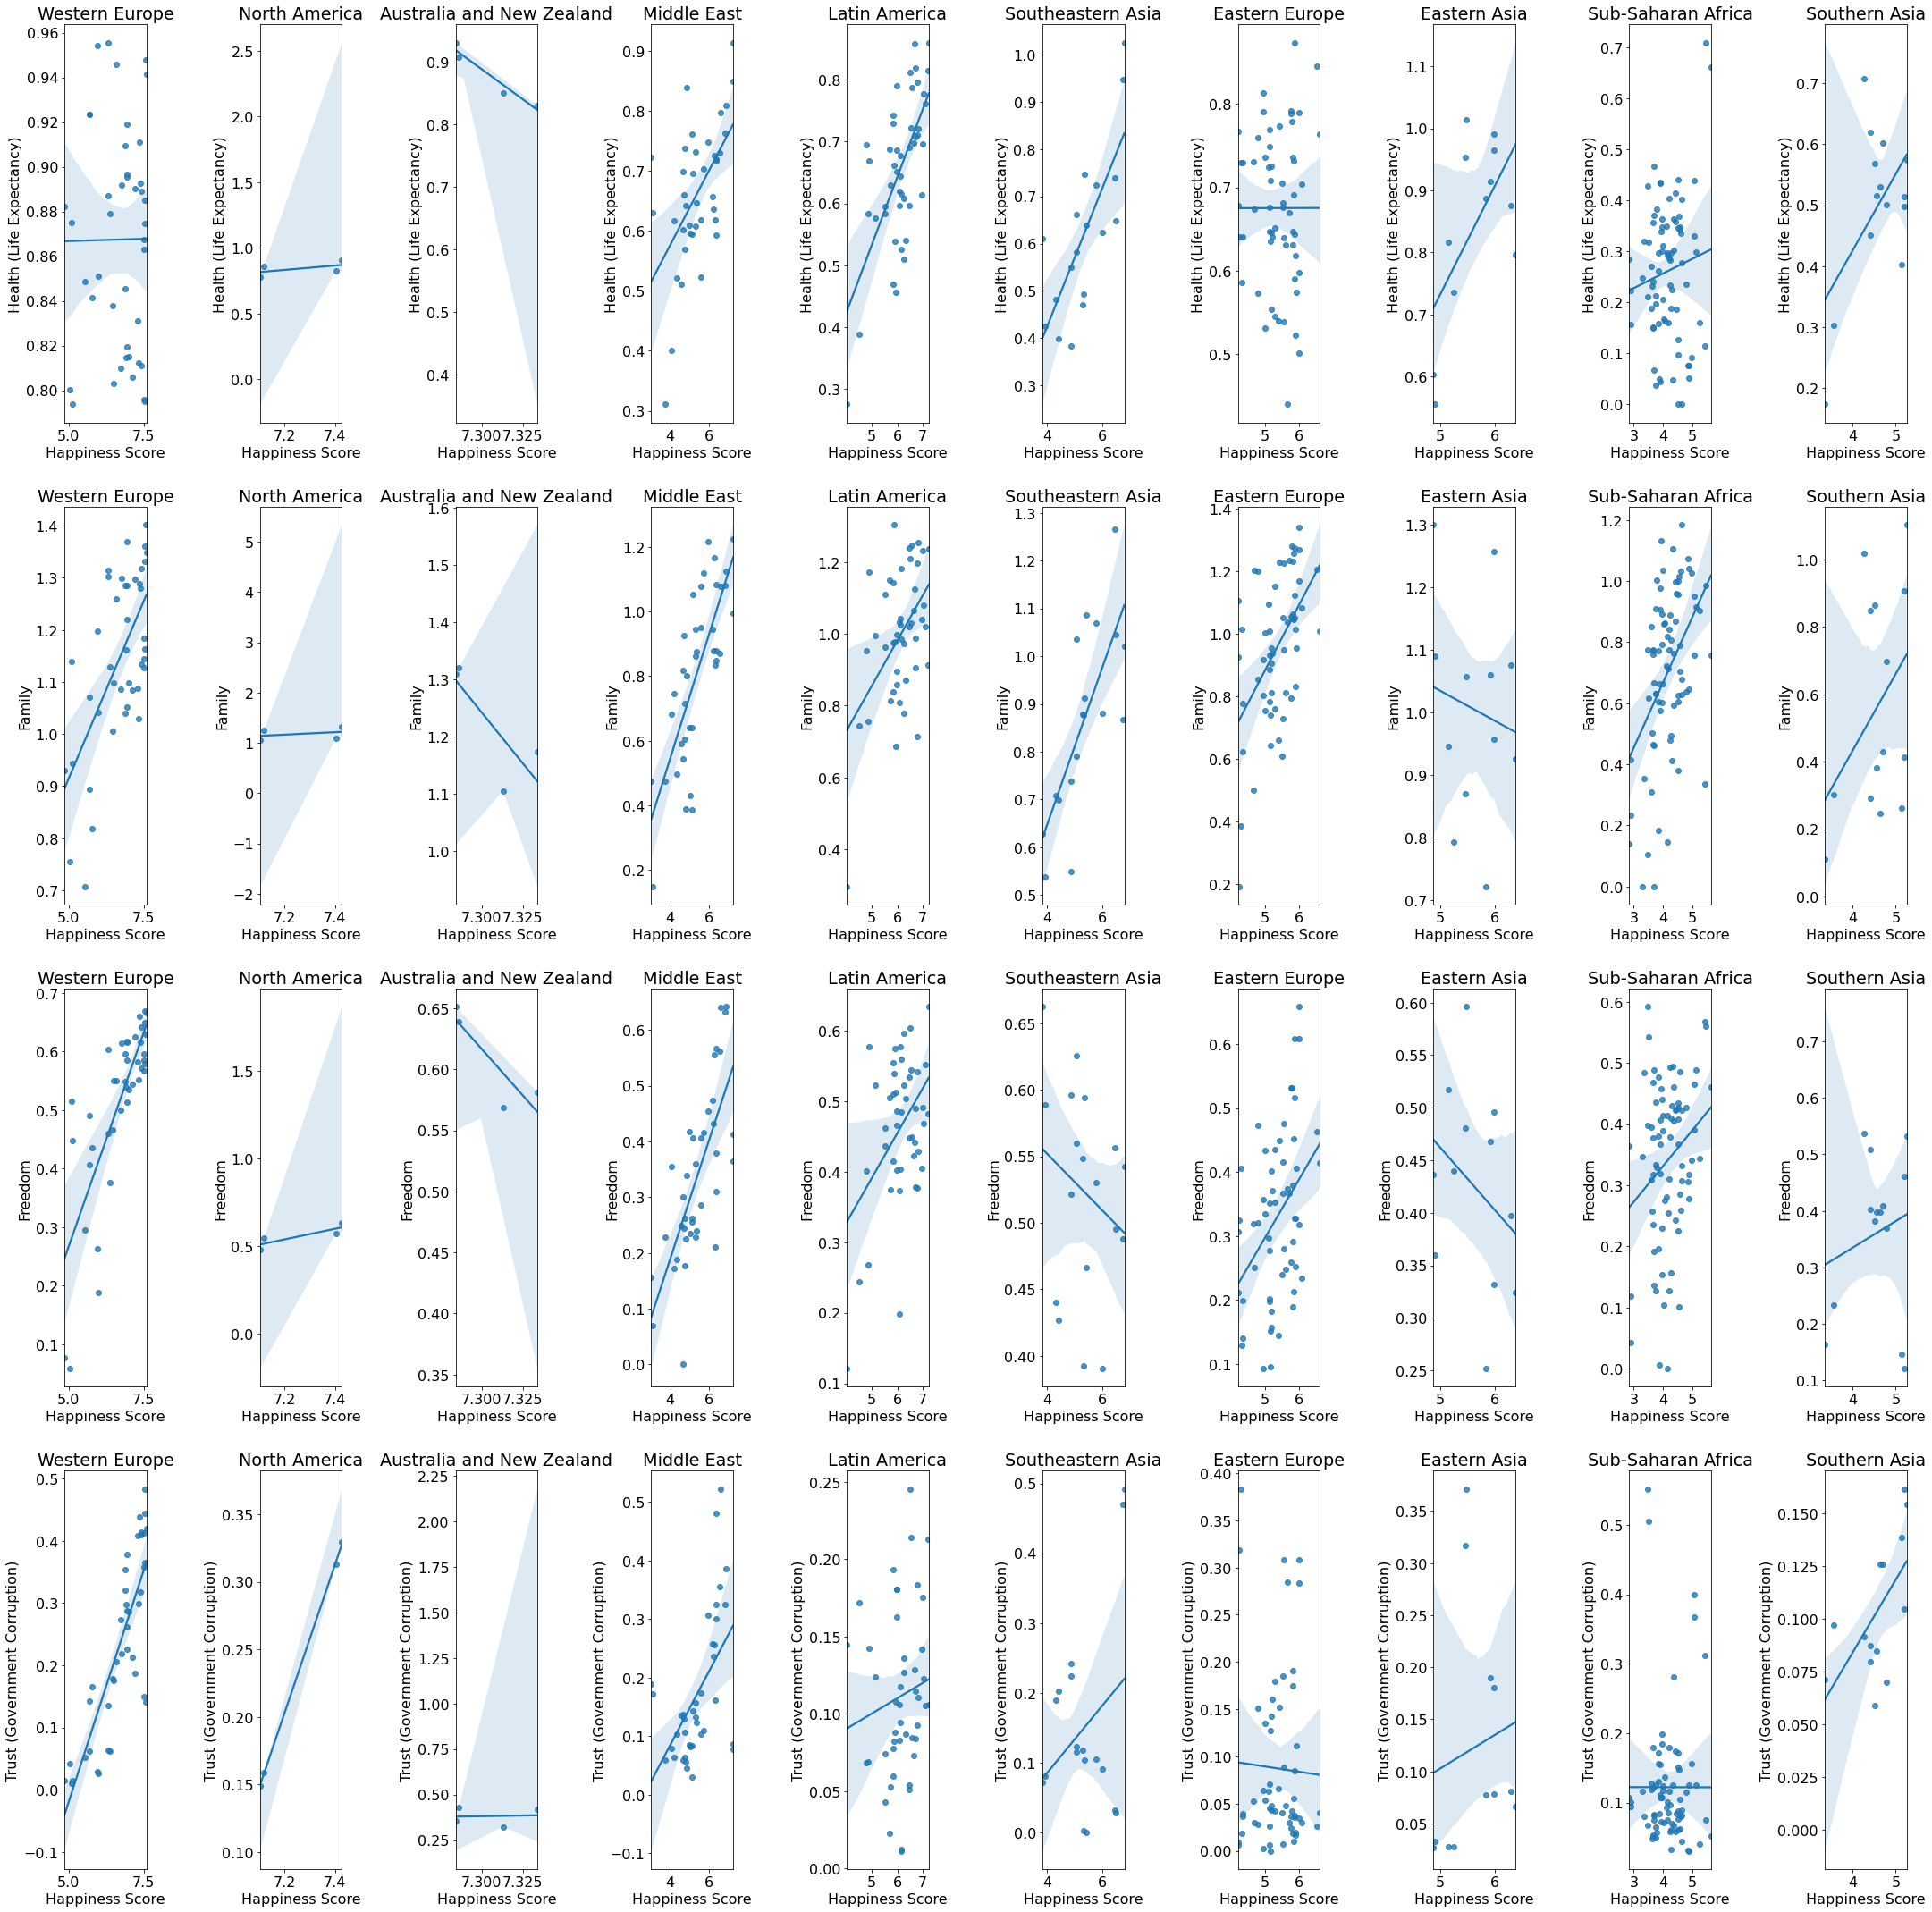

In [ ]:
#Happiness vs. Health/Family/Freedom/Trust per region
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

region_vals = df_happiness['Region'].unique()[0:10]
fig, axs = plt.subplots(ncols=10, nrows=4, figsize=(30,30))
for x in range(len(region_vals)):
  sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == region_vals[x]], df_happiness['Health (Life Expectancy)'].loc[df_happiness['Region'] == region_vals[x]], ax = axs[0,x])
  sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == region_vals[x]], df_happiness['Family'].loc[df_happiness['Region'] == region_vals[x]], ax = axs[1,x])
  sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == region_vals[x]], df_happiness['Freedom'].loc[df_happiness['Region'] == region_vals[x]], ax = axs[2,x])
  sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == region_vals[x]], df_happiness['Trust (Government Corruption)'].loc[df_happiness['Region'] == region_vals[x]], ax = axs[3,x])
  if x == 3:
    axs[0,x].title.set_text('Middle East')
    axs[1,x].title.set_text('Middle East')
    axs[2,x].title.set_text('Middle East')
    axs[3,x].title.set_text('Middle East')
  elif x == 4:
    axs[0,x].title.set_text('Latin America')
    axs[1,x].title.set_text('Latin America')
    axs[2,x].title.set_text('Latin America')
    axs[3,x].title.set_text('Latin America')
  elif x == 6:
    axs[0,x].title.set_text('Eastern Europe')
    axs[1,x].title.set_text('Eastern Europe')
    axs[2,x].title.set_text('Eastern Europe')
    axs[3,x].title.set_text('Eastern Europe')
  else:
    axs[0,x].title.set_text(region_vals[x])
    axs[1,x].title.set_text(region_vals[x])
    axs[2,x].title.set_text(region_vals[x])
    axs[3,x].title.set_text(region_vals[x])

fig.tight_layout(w_pad=0.2, h_pad=2)



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


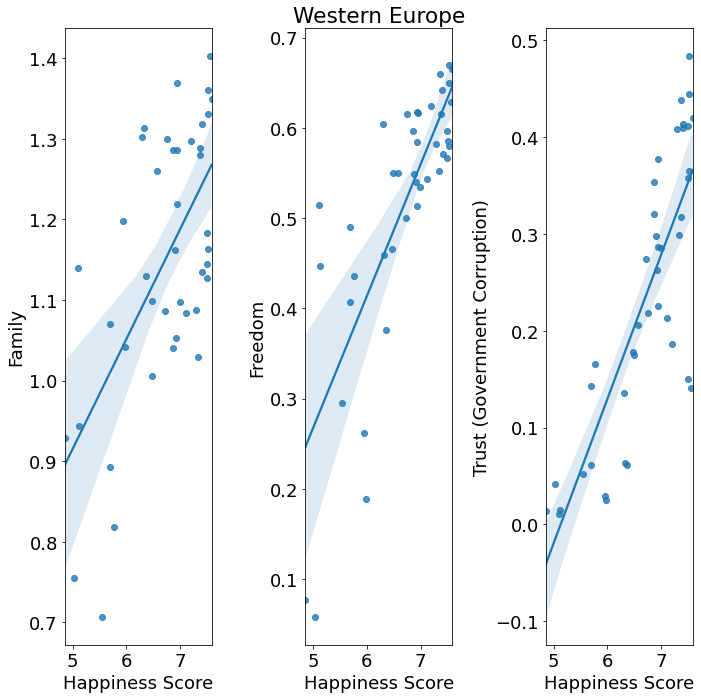

In [ ]:
#Western Europe
fig, axs = plt.subplots(ncols=3, figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Western Europe'], df_happiness['Family'].loc[df_happiness['Region'] == 'Western Europe'], ax = axs[0])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Western Europe'], df_happiness['Freedom'].loc[df_happiness['Region'] == 'Western Europe'], ax = axs[1])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Western Europe'], df_happiness['Trust (Government Corruption)'].loc[df_happiness['Region'] == 'Western Europe'], ax = axs[2])
axs[1].title.set_text('Western Europe')
fig.tight_layout()

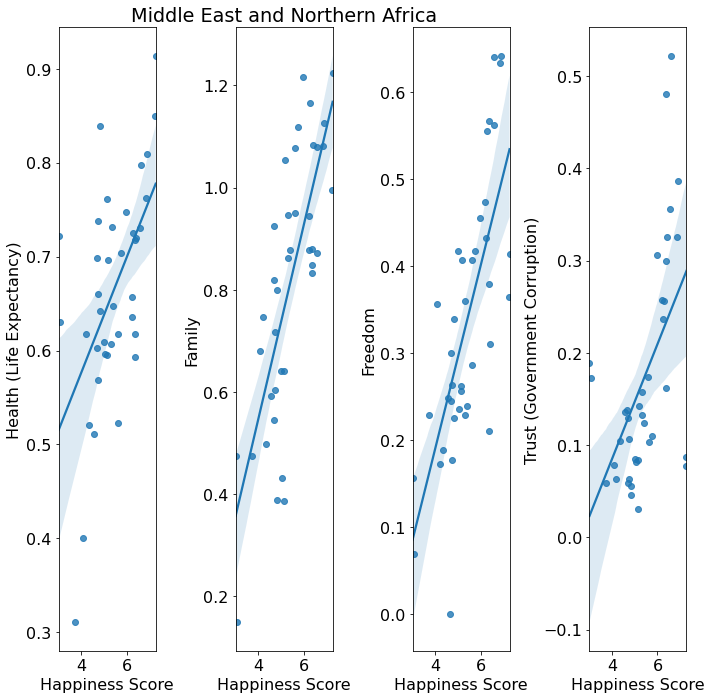

In [ ]:
#Middle East and Northern Africa
fig, axs = plt.subplots(ncols=4, figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], df_happiness['Health (Life Expectancy)'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], ax = axs[0])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], df_happiness['Family'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], ax = axs[1])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], df_happiness['Freedom'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], ax = axs[2])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], df_happiness['Trust (Government Corruption)'].loc[df_happiness['Region'] == 'Middle East and Northern Africa'], ax = axs[3])
axs[1].title.set_text('Middle East and Northern Africa')
fig.tight_layout(w_pad=-4)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


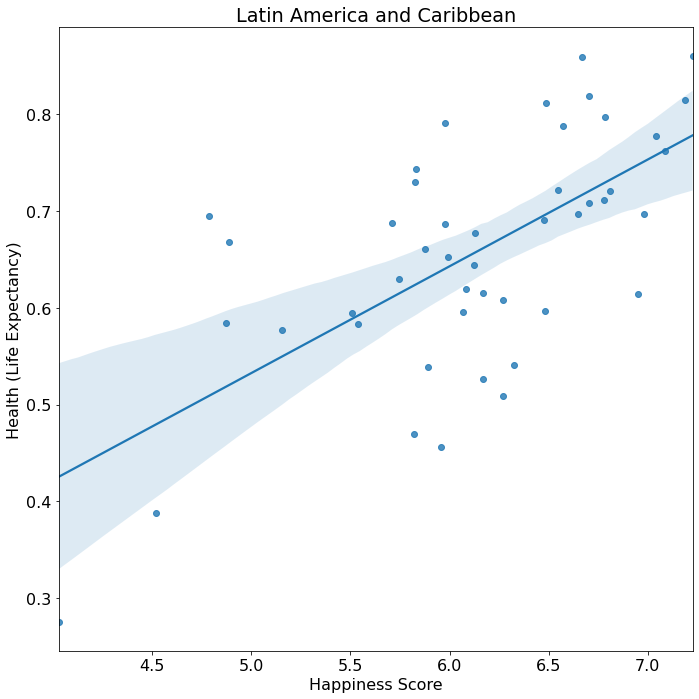

In [ ]:
#'Latin America and Caribbean'
fig, axs = plt.subplots(figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Latin America and Caribbean'], df_happiness['Health (Life Expectancy)'].loc[df_happiness['Region'] == 'Latin America and Caribbean'], ax = axs)
axs.title.set_text('Latin America and Caribbean')
fig.tight_layout(w_pad=-3)

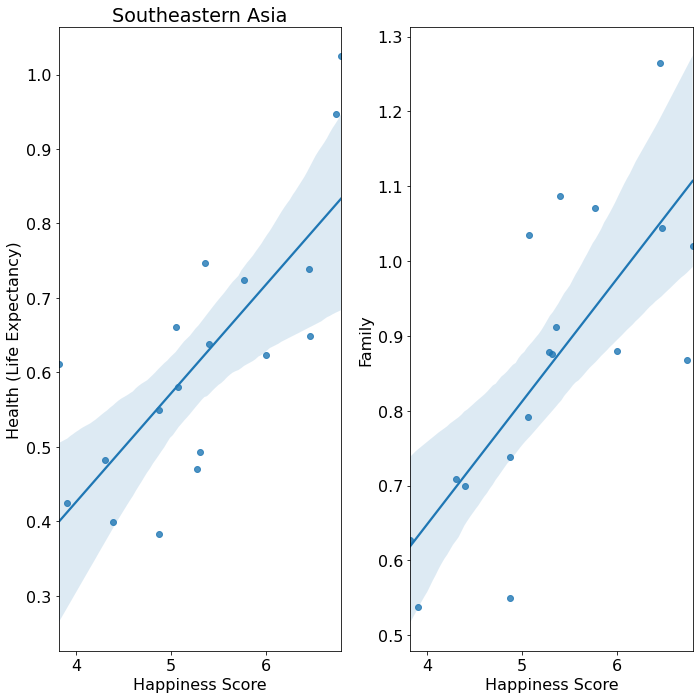

In [ ]:
#'Southeastern Asia'
fig, axs = plt.subplots(ncols=2, figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Southeastern Asia'], df_happiness['Health (Life Expectancy)'].loc[df_happiness['Region'] == 'Southeastern Asia'], ax = axs[0])
sn.regplot(df_happiness['Happiness Score'].loc[df_happiness['Region'] == 'Southeastern Asia'], df_happiness['Family'].loc[df_happiness['Region'] == 'Southeastern Asia'], ax = axs[1])
axs[0].title.set_text('Southeastern Asia')
fig.tight_layout()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


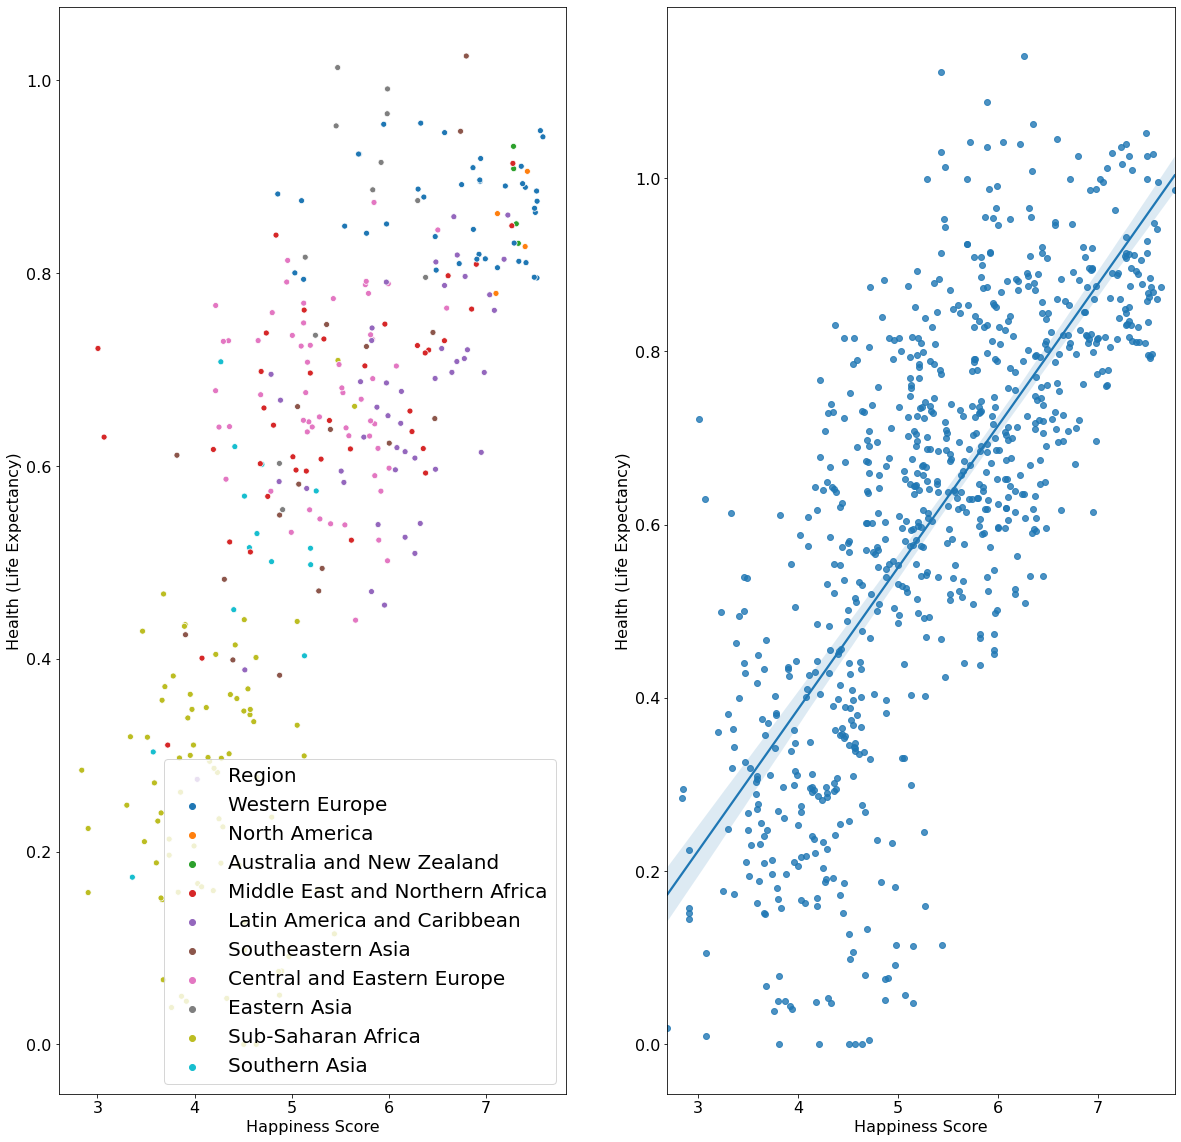

In [ ]:
#Scatter Plot- detail life expectancy
fig, axs = plt.subplots(ncols=2, figsize=(20,20))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

#Happiness & Life Expectancy 
sn.scatterplot(df_happiness['Happiness Score'], df_happiness['Health (Life Expectancy)'], hue = df_happiness['Region'], ax = axs[0], legend = 'full')
sn.regplot(df_happiness['Happiness Score'], df_happiness['Health (Life Expectancy)'], ax = axs[1])

## Hypothesis 3
Negative prevailing tones of annualized events in a country has a negative relationship to happiness scores.

**Conclusion:** Likely false. While there is a positive correlation between the prevailing tone of events over 2015 - 2020 for some countries, others show negative correlations. See Fig. 1 for sampled countries. Plotting the strength of this correlation across all countries we see no obvious pattern. See Fig. 2.

Fig. 1: Correlation of prevailing tone of events to happiness score for selected
countries.



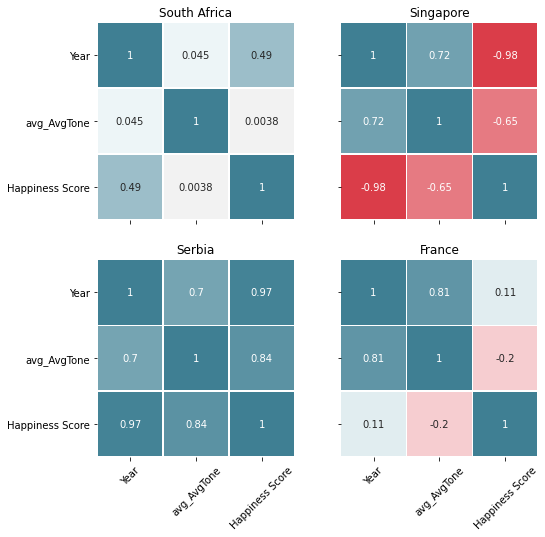

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

alpha_map = lambda x: df_codes[df_codes.country == x]['alpha-2'].values[0]

country_name = ['South Africa', 'Singapore', 'Serbia', 'France']
country_alpha = [alpha_map(c) for c in country_name]

events = df_events[df_events.ActionGeo_CountryCode.isin(country_alpha)][['Year', 'ActionGeo_CountryCode', 'avg_AvgTone']].groupby(['Year', 'ActionGeo_CountryCode']).mean()
happiness = df_happiness[df_happiness.Country.isin(country_name)][['Year', 'Country', 'Happiness Score']]
happiness.Country = happiness.Country.map(dict(zip(country_name, country_alpha)))
merged = events.merge(happiness, how = 'left', left_on = ['Year', 'ActionGeo_CountryCode'], right_on = ['Year', 'Country'])

ax1, ax2, ax3, ax4 = None, None, None, None

axes = ((ax1, ax2), (ax3, ax4))
heatmaps = []
cmap_palette = sn.diverging_palette(10, 220, as_cmap=True)
mask = np.triu(np.ones_like([[0,0,0],[0,0,0],[0,0,0]], dtype=np.bool))

fig, axes = plt.subplots(ncols = 2,  nrows = 2, sharey=True)
fig.set_size_inches(8,8)

iter = 0
for r in range(len(axes)):
  for c in range(len(axes[r])):
    axes[r][c].set_title(country_name[iter])
    heatmaps.append(sn.heatmap(merged[merged.Country == country_alpha[iter]].corr(), annot=True, cmap = cmap_palette, center = 0, vmin = -1, vmax = 1, square=True, linewidths=.5, ax = axes[r][c], cbar = False))
    iter += 1

heatmaps[0].set_yticklabels(heatmaps[0].get_yticklabels(), rotation=0)
heatmaps[0].set_xticklabels('')
heatmaps[1].set_xticklabels('')
heatmaps[2].set_yticklabels(heatmaps[2].get_yticklabels(), rotation=0)
heatmaps[2].set_xticklabels(heatmaps[2].get_xticklabels(), rotation=45)
heatmaps[3].set_xticklabels(heatmaps[3].get_xticklabels(), rotation=45)

print('Fig. 1: Correlation of prevailing tone of events to happiness score for selected\ncountries.\n')
plt.show()

Fig. 1: Correlation of prevailing tone of events to happiness score for all
countries.



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


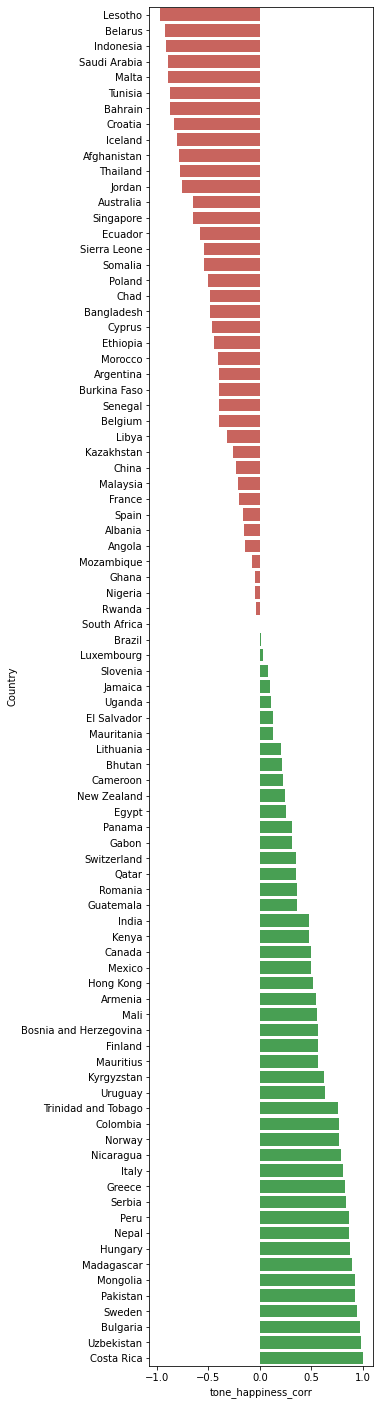

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

print('Fig. 1: Correlation of prevailing tone of events to happiness score for all\ncountries.\n')

def translate(country_def):
  if len(country_def) == 3:
    if country_def in df_codes['alpha-2'].values:
      return df_codes[df_codes['alpha-2'] == country_def]['country'].values[0]
    else:
      return ''
  else:
    if country_def in df_codes.country.values:
      return df_codes[df_codes.country == country_def]['alpha-2'].values[0]
    else:
      return ''

country_alpha = [translate(c) for c in df_happiness['Country']]

events = df_events[df_events.ActionGeo_CountryCode.isin(country_alpha)][['Year', 'ActionGeo_CountryCode', 'avg_AvgTone']].groupby(['Year', 'ActionGeo_CountryCode']).mean()
happiness = df_happiness[['Year', 'Country', 'Happiness Score']]
happiness.Country = happiness.Country.map(dict(zip(df_happiness['Country'], country_alpha)))
merged = events.merge(happiness, how = 'left', left_on = ['Year', 'ActionGeo_CountryCode'], right_on = ['Year', 'Country'])

grouped_df = merged.groupby('Country')[['Happiness Score', 'avg_AvgTone']].corr()
grouped_df.reset_index(inplace=True)

df_plot = grouped_df[grouped_df.level_1 == 'Happiness Score'][['Country', 'avg_AvgTone']]
df_plot = df_plot[df_plot.avg_AvgTone > -2]
df_plot.sort_values('avg_AvgTone', inplace=True)

clrs = [sn.xkcd_rgb["pale red"] if x < 0 else sn.xkcd_rgb["medium green"] for x in df_plot['avg_AvgTone'].values]

fig = plt.figure(figsize = (4,25))

df_plot.Country = df_plot.Country.map(dict(zip(country_alpha, df_happiness['Country'])))
df_plot.rename(columns = {'avg_AvgTone': 'tone_happiness_corr'}, inplace=True) 
q = sn.barplot(x = df_plot['tone_happiness_corr'], y = df_plot['Country'], palette = clrs)

plt.show()

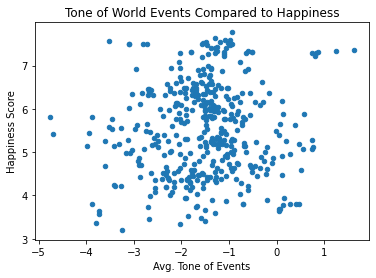

In [ ]:
merged.rename(columns = {'avg_AvgTone': 'Avg. Tone of Events'}, inplace=True) 
merged.plot(kind='scatter', x = 'Avg. Tone of Events', y = 'Happiness Score', title = 'Tone of World Events Compared to Happiness')

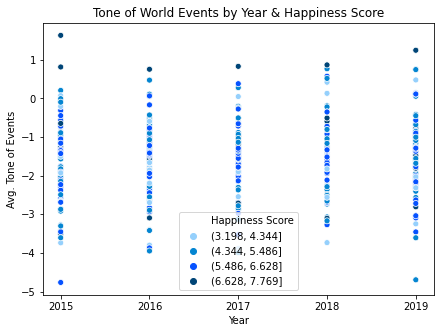

In [ ]:
pal = sn.xkcd_palette(['light blue', 'cerulean', 'electric blue', 'prussian blue'])
#diverging_palette(0, 50, as_cmap=True)
fig, ax = plt.subplots(figsize=(7,5))

y = sn.scatterplot(x = merged.Year, y = merged['Avg. Tone of Events'], hue = pd.cut(merged['Happiness Score'], bins=4), palette=pal, ax = ax)
y.set_title('Tone of World Events by Year & Happiness Score')
y.set_xticks([2015,2016,2017,2018,2019])


plt.show()

In [ ]:
print(f'There are {df_plot[df_plot.tone_happiness_corr > 0].count().values[0]} countries where the tone of events is POSITIVELY correlated with happiness.')
print(f'There are {df_plot[df_plot.tone_happiness_corr < 0].count().values[0]} countries where the tone of events is NEGATIVELY correlated with happiness.')

There are 48 countries where the tone of events is POSITIVELY correlated with happiness.
There are 39 countries where the tone of events is NEGATIVELY correlated with happiness.


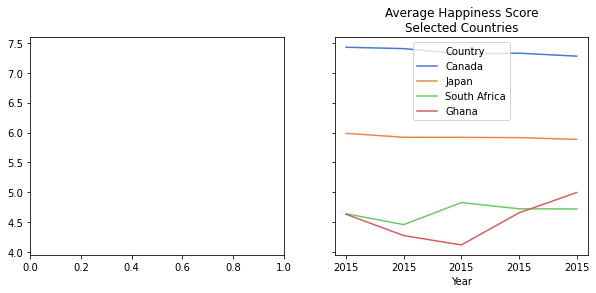

In [ ]:
df_hap_exp = df_happiness[['Year', 'Country', 'Happiness Score']]

import seaborn as sn
import matplotlib.pyplot as plt

sn.set_palette(sn.color_palette("muted"))
fig, (ax_a, ax_b) = plt.subplots(ncols = 2,  nrows = 1, sharey=True, figsize = (10, 4))

ax_b = sn.lineplot(x = 'Year', 
                   y = 'Happiness Score',
                   data = df_hap_exp[df_hap_exp.Country.isin(['Japan', 'South Africa', 'Canada', 'Ghana'])],
                   ci = None,
                   hue = 'Country',
                   )
ax_b.set_title('Average Happiness Score\nSelected Countries')
ax_b.set_xticklabels(df_hap_exp['Year'].astype(int))

plt.show()

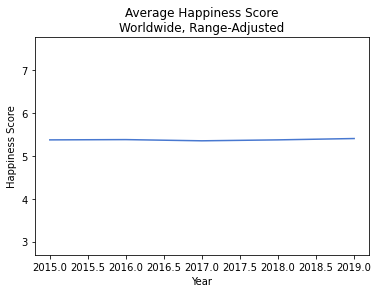

In [ ]:
df_hap_exp = df_happiness[['Year', 'Country', 'Happiness Score']]

import seaborn as sn
import matplotlib.pyplot as plt

ymin = min(df_hap_exp['Happiness Score'])
ymax = max(df_hap_exp['Happiness Score'])

sn.set_palette(sn.color_palette("muted"))
plt.ylim((ymin, ymax))

h = sn.lineplot(x = 'Year', 
                y = 'Happiness Score',
                data = df_hap_exp,
                ci = None,
                )
h.set_title('Average Happiness Score\nWorldwide, Range-Adjusted')
#h.set_xticklabels(df_hap_exp['Year'].astype(int))
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


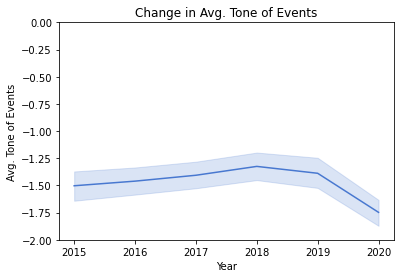

In [ ]:
sn.set_palette(sn.color_palette("muted"))
exp = df_events[['Year', 'avg_AvgTone']]
exp.rename(columns = {'avg_AvgTone': 'Avg. Tone of Events'},
                      inplace = True)
plt.ylim((-2, 0))
a = sn.lineplot(x = exp['Year'],
                y = exp['Avg. Tone of Events'],
               )
a.set_title('Change in Avg. Tone of Events')
plt.show()